In [1]:
import pandas as pd
df = pd.read_csv('cricketers.csv',delimiter = '\t',header=0)
print (df.describe())
#print (df.head(5))

       matches_played  innings_batted  runs_scored  highest_runs  balls_faced  \
count      109.000000      109.000000   109.000000    109.000000   109.000000   
mean         9.559633        7.889908   173.633028     43.495413   124.669725   
std          5.161164        4.982078   182.356522     29.830268   123.670265   
min          0.000000        0.000000     0.000000      0.000000     0.000000   
25%          5.000000        4.000000    36.000000     20.000000    33.000000   
50%         10.000000        7.000000    99.000000     40.000000    76.000000   
75%         14.000000       13.000000   260.000000     62.000000   188.000000   
max         17.000000       17.000000   735.000000    128.000000   516.000000   

       average_runs  strike_rate  innings_bowled       overs  runs_given  \
count    109.000000   109.000000      109.000000  109.000000   109.00000   
mean      22.360092   122.258716        4.513761   13.894495   119.93578   
std       16.093453    48.576709        5.

In [2]:
import numpy as np

df = df.drop(['PLAYER'], axis=1)

# classification needs scaled data and this can be used 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)



In [3]:
df_scaled = pd.DataFrame(data=scaled_df)

df_new = df_scaled[[5,12]]

df_new.columns = ['average_runs', 'bowling_economy']

print (df_new.describe())

X = df_new.iloc[:, :].values




       average_runs  bowling_economy
count  1.090000e+02     1.090000e+02
mean  -8.555847e-17    -5.703898e-17
std    1.004619e+00     1.004619e+00
min   -1.395808e+00    -1.083832e+00
25%   -6.592040e-01    -1.083832e+00
50%   -7.491462e-02     4.483192e-01
75%    4.769142e-01     8.587169e-01
max    3.337810e+00     2.388764e+00


In [6]:
import random as rd
import matplotlib.pyplot as plt

X = df_new.iloc[:, :].values
p = np.mean(X, axis = 0)

m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

myDict = {} 

my_list = []

for g in range (2,6):
     K=g # number of clusters
     
     Centroids=np.array([]).reshape(n,0) 
     
     for i in range(K):
         rand=rd.randint(0,m-1)
         Centroids=np.c_[Centroids,X[rand]]
         
     Output={}
     
     EuclidianDistance=np.array([]).reshape(m,0)
     
     for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
     C=np.argmin(EuclidianDistance,axis=1)+1
     
     Y={}
     for k in range(K):
         Y[k+1]=np.array([]).reshape(2,0)
     for i in range(m):
         Y[C[i]]=np.c_[Y[C[i]],X[i]]
          
     for k in range(K):
         Y[k+1]=Y[k+1].T
         
     for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
            
     myDict[str(g)+'_0'] = Centroids[:].copy()      
             
     for i in range(n_iter):
          #step 2.a
           EuclidianDistance=np.array([]).reshape(m,0)
           for k in range(K):
               tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
               EuclidianDistance=np.c_[EuclidianDistance,tempDist]
           C=np.argmin(EuclidianDistance,axis=1)+1
          #step 2.b
           Y={}
           for k in range(K):
               Y[k+1]=np.array([]).reshape(2,0)
           for j in range(m):
               Y[C[j]]=np.c_[Y[C[j]],X[j]]
          
           for k in range(K):
               Y[k+1]=Y[k+1].T
         
           for k in range(K):
               Centroids[:,k]=np.mean(Y[k+1],axis=0)
           myDict[str(g)+'_'+str(i+1)] = Centroids[:].copy()

        
           new = myDict.get(str(g)+'_'+str(i+1))
           old = myDict.get(str(g)+'_'+str(i))

           comparison = np.round(new,4) == np.round(old,4)
           equal_arrays = comparison.all()
           #print(equal_arrays)
           #print(myDict)
           if equal_arrays :
               my_list.append([1,g,i+1])
               break
               

     

p = np.mean(X, axis = 0)

myDict = {} 

#my_list = []

for g in range (2,6):
     K=g # number of clusters
     
     Centroids=np.array([]).reshape(n,0) 
     
     for i in range(K):
         rand=rd.randint(0,m-1)
         Centroids=np.c_[Centroids,p+X[rand]]
         
     Output={}
     
     EuclidianDistance=np.array([]).reshape(m,0)
     
     for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
     C=np.argmin(EuclidianDistance,axis=1)+1
     
     Y={}
     for k in range(K):
         Y[k+1]=np.array([]).reshape(2,0)
     for i in range(m):
         Y[C[i]]=np.c_[Y[C[i]],X[i]]
          
     for k in range(K):
         Y[k+1]=Y[k+1].T
         
     for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
            
     myDict[str(g)+'_0'] = Centroids[:].copy()      
             
     for i in range(n_iter):
          #step 2.a
           EuclidianDistance=np.array([]).reshape(m,0)
           for k in range(K):
               tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
               EuclidianDistance=np.c_[EuclidianDistance,tempDist]
           C=np.argmin(EuclidianDistance,axis=1)+1
          #step 2.b
           Y={}
           for k in range(K):
               Y[k+1]=np.array([]).reshape(2,0)
           for j in range(m):
               Y[C[j]]=np.c_[Y[C[j]],X[j]]
          
           for k in range(K):
               Y[k+1]=Y[k+1].T
         
           for k in range(K):
               Centroids[:,k]=np.mean(Y[k+1],axis=0)
           myDict[str(g)+'_'+str(i+1)] = Centroids[:].copy()

        
           new = myDict.get(str(g)+'_'+str(i+1))
           old = myDict.get(str(g)+'_'+str(i))

           comparison = np.round(new,4) == np.round(old,4)
           equal_arrays = comparison.all()
           #print(equal_arrays)
           #print(myDict)
           if equal_arrays :
               my_list.append([2,g,i+1])
               break 
print(my_list)
df_res = pd.DataFrame(data=my_list , columns=["Strategy", "Cluster_No","Iterations"])
print(df_res)



[[1, 2, 2], [1, 3, 5], [1, 4, 6], [1, 5, 3], [2, 2, 3], [2, 3, 3], [2, 4, 6], [2, 5, 12]]
   Strategy  Cluster_No  Iterations
0         1           2           2
1         1           3           5
2         1           4           6
3         1           5           3
4         2           2           3
5         2           3           3
6         2           4           6
7         2           5          12


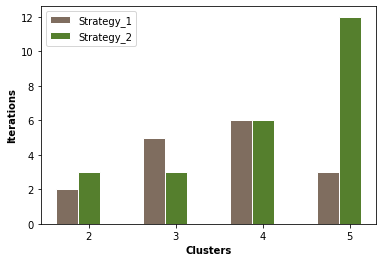

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = df_res[(df_res.Strategy == 1)]['Iterations'].values
bars2 = df_res[(df_res.Strategy == 2)]['Iterations'].values

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Strategy_1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Strategy_2')

 
# Add xticks on the middle of the group bars
plt.xlabel('Clusters', fontweight='bold')
plt.ylabel('Iterations', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2', '3', '4', '5'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


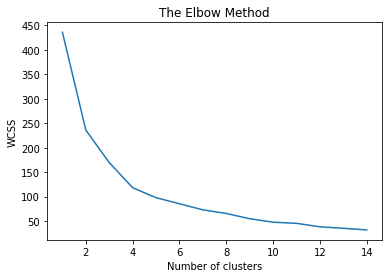

In [12]:
from sklearn.cluster import KMeans

df_in = df_scaled[[2,5,10,12]]

df_in.columns = ['runs_scored','average_runs', 'wickets_obtained','bowling_economy']

X = df_in.iloc[:, :].values
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
from sklearn.cluster import KMeans
df_out = pd.read_csv('cricketers.csv',delimiter = '\t',header=0)

df_decision = df_scaled[[2,10]]

df_decision.columns = ['runs_scored', 'wickets_obtained']

X = df_decision.iloc[:, :].values
wcss = []
for i in range(2, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    print(kmeans.predict(X))
    arr = kmeans.predict(X)
    df_out['k_'+str(i)] = pd.Series(arr)

    
#print(df_out[['PLAYER','runs_scored', 'wickets_obtained','k_2','k_3','k_4']])

df_out['Allrounder'] = df_out[['runs_scored', 'wickets_obtained']].mean(axis=1)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 0 2 2 1 1 2 2 1 1 0 0 1 2 1 1 1 1 1 1 2 1 0 2 0 1 1 1 1 2 1 1 0
 1 2 2 0 1 0 0 1 1 2 2 0 1 1 1 0 1 1 1 2 1 1 1 2 0 0 1 2 1 1 1 1 2 2 2 1 0
 0 0 1 0 1 2 0 2 0 1 1 2 0 1 1 2 0 0 1 1 1 0 1 1 1 1 1 2 2 1 1 1 1 1 2]
[0 2 0 3 0 2 1 1 0 0 1 1 0 0 3 2 0 1 0 0 0 0 0 0 1 0 2 1 3 0 0 0 0 1 0 0 3
 0 1 1 2 0 2 3 0 0 1 1 2 0 0 3 3 0 0 0 1 0 0 0 1 2 3 0 1 3 3 0 3 1 1 1 0 2
 3 3 0 2 0 1 2 1 2 0 0 1 3 3 0 1 2 2 0 0 3 2 0 0 3 0 0 1 1 0 0 0 0 0 1]


In [48]:
#print(df_out[(df_out.k_2 == 0)][['PLAYER','runs_scored', 'wickets_obtained']])
#print(df_out[(df_out.k_2 == 1)][['PLAYER','runs_scored', 'wickets_obtained']])

#print(df_out[(df_out.k_3 == 0)][['PLAYER','runs_scored', 'wickets_obtained']].sort_values(by=['runs_scored'],ascending=False))
#print(df_out[(df_out.k_3 == 1)][['PLAYER','runs_scored', 'wickets_obtained']].sort_values(by=['runs_scored'],ascending=False))
#print(df_out[(df_out.k_3 == 1)][['PLAYER','runs_scored', 'wickets_obtained']].sort_values(by=['wickets_obtained'],ascending=False))
#print(df_out[(df_out.k_3 == 2)][['PLAYER','runs_scored', 'wickets_obtained']].sort_values(by=['wickets_obtained'],ascending=False))


#batsmen

bat = df_out[(df_out.k_3 == 0)][['PLAYER','runs_scored', 'wickets_obtained','Allrounder']].sort_values(by=['runs_scored'],ascending=False).head(4)
bat['primary'] = 'Bat'
bowl = df_out[(df_out.k_3 == 2)][['PLAYER','runs_scored', 'wickets_obtained','Allrounder']].sort_values(by=['wickets_obtained'],ascending=False).head(4)
bowl['primary'] = 'Bowl'
allr = df_out[(df_out.k_3 == 1)][['PLAYER','runs_scored', 'wickets_obtained','Allrounder']].sort_values(by=['Allrounder'],ascending=False).head(3)
allr['primary'] = 'Allrounder'
bat.head()
bat = pd.concat([bowl, bat], ignore_index=True)
bat = pd.concat([allr, bat], ignore_index=True)
bat.head(12)


,PLAYER,runs_scored,wickets_obtained,Allrounder,primary
0,Yusuf Pathan,260,1,130.5,Allrounder
1,Mandeep Singh,252,0,126.0,Allrounder
2,Prithvi Shaw,245,0,122.5,Allrounder
3,Andrew Tye,32,24,28.0,Bowl
4,Rashid Khan,59,21,40.0,Bowl
5,Hardik Pandya,260,18,139.0,Bowl
6,Sunil 0rine,357,17,187.0,Bowl
7,Kane Williamson,735,0,367.5,Bat
8,Rishabh Pant,684,0,342.0,Bat
9,Lokesh Rahul,659,0,329.5,Bat


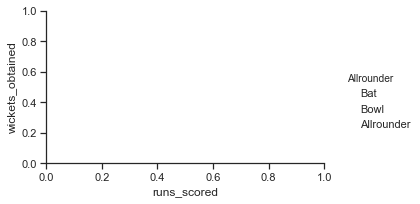

In [52]:
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')


prim= ['Bat', 'Bowl', 'Allrounder']
df = bat[['runs_scored', 'wickets_obtained','Allrounder']]

fg = seaborn.FacetGrid(data=df, hue='Allrounder', hue_order=prim, aspect=1.61)
fg.map(pyplot.scatter, 'runs_scored', 'wickets_obtained').add_legend()

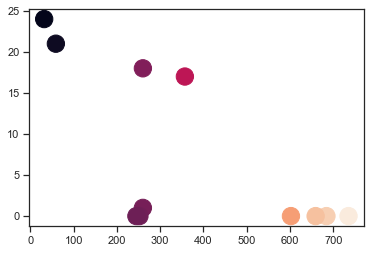

In [54]:
plt.scatter(bat.runs_scored, bat.wickets_obtained, s=300, c=bat.Allrounder)